<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/poly_sin_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 汎化性（交差確認法によるモデル選択）

サイン関数の多項式回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

データの生成（20サンプル）

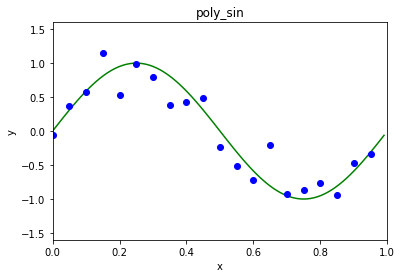

In [3]:
#Sine curve
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=20
x_train = np.arange(0, 1, 1.0/N)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

plt.plot(x_real, y_real, 'g-')
plt.plot(x_train, y_train, 'bo') 
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('poly_sin_cv20.eps')
plt.show()
plt.close()

多項式回帰の当てはめ（モデル選択）

[ 0  2  4  5  7  8 10 11 12 13 14 15 16 17 18 19] [1 3 6 9]
[0.   0.1  0.2  0.25 0.35 0.4  0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.06046692  0.568327    0.53010236  0.98644019  0.39062165  0.42242036
 -0.2288267  -0.52077513 -0.71893716 -0.1985039  -0.92562733 -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [-0.19674901]


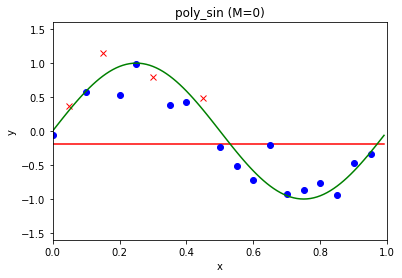

MSE= 0.893394551265053
[ 0  1  2  3  5  6  7  8  9 12 14 15 16 17 18 19] [ 4 10 11 13]
[0.   0.05 0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.06046692  0.36332735  0.568327    1.14644548  0.98644019  0.80149692
  0.39062165  0.42242036  0.48091338 -0.71893716 -0.92562733 -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [0.00388765]


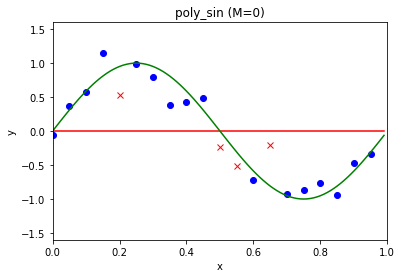

MSE= 0.16182281646703936
[ 0  1  2  3  4  5  6  8  9 10 11 13 14 16 17 19] [ 7 12 15 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.55 0.65 0.7  0.8
 0.85 0.95]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.98644019
  0.80149692  0.42242036  0.48091338 -0.2288267  -0.52077513 -0.1985039
 -0.92562733 -0.76051615 -0.9455376  -0.34275333]
W
 [0.08227912]


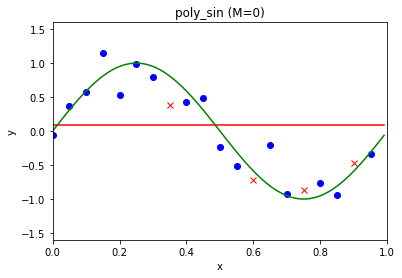

MSE= 0.48907836494771356
[ 0  1  2  3  4  6  7  9 10 11 12 13 14 15 17 18] [ 5  8 16 19]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.85 0.9 ]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.80149692
  0.39062165  0.48091338 -0.2288267  -0.52077513 -0.71893716 -0.1985039
 -0.92562733 -0.87382966 -0.9455376  -0.47012182]
W
 [-0.04133701]


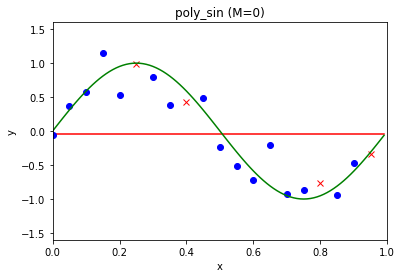

MSE= 0.46986682420288794
[ 1  3  4  5  6  7  8  9 10 11 12 13 15 16 18 19] [ 0  2 14 17]
[0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.75 0.8
 0.9  0.95]
[ 0.36332735  1.14644548  0.53010236  0.98644019  0.80149692  0.39062165
  0.42242036  0.48091338 -0.2288267  -0.52077513 -0.71893716 -0.1985039
 -0.87382966 -0.76051615 -0.47012182 -0.34275333]
W
 [0.06296899]


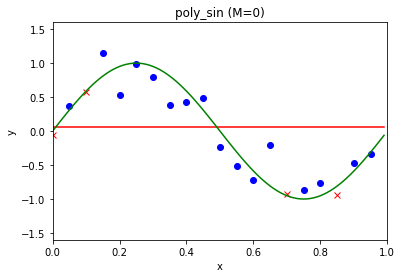

MSE= 0.5662578417475732
CV_MSE[0]=0.516084
[ 0  1  2  3  4  5  7  8  9 10 11 13 14 16 17 19] [ 6 12 15 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.8
 0.85 0.95]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.98644019
  0.39062165  0.42242036  0.48091338 -0.2288267  -0.52077513 -0.1985039
 -0.92562733 -0.76051615 -0.9455376  -0.34275333]
W
 [ 0.76901381 -1.64009069]


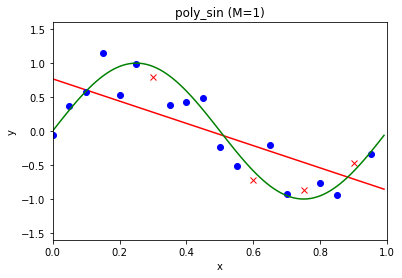

MSE= 0.18888744751501602
[ 0  1  2  3  4  6  7  8 10 11 12 13 15 16 17 18] [ 5  9 14 19]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.75 0.8
 0.85 0.9 ]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.80149692
  0.39062165  0.42242036 -0.2288267  -0.52077513 -0.71893716 -0.1985039
 -0.87382966 -0.76051615 -0.9455376  -0.47012182]
W
 [ 0.74421298 -1.74296246]


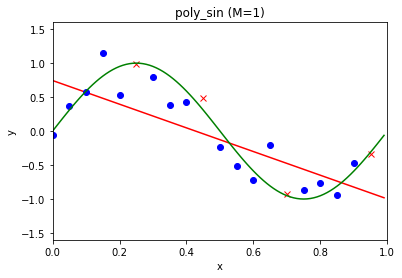

MSE= 0.31424858737212513
[ 0  1  3  4  5  6  8  9 10 11 12 14 15 17 18 19] [ 2  7 13 16]
[0.   0.05 0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.85
 0.9  0.95]
[-0.06046692  0.36332735  1.14644548  0.53010236  0.98644019  0.80149692
  0.42242036  0.48091338 -0.2288267  -0.52077513 -0.71893716 -0.92562733
 -0.87382966 -0.9455376  -0.47012182 -0.34275333]
W
 [ 0.7926804  -1.71560737]


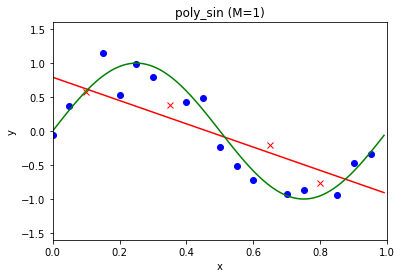

MSE= 0.02254342154530152
[ 2  3  4  5  6  7  8  9 12 13 14 15 16 17 18 19] [ 0  1 10 11]
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.568327    1.14644548  0.53010236  0.98644019  0.80149692  0.39062165
  0.42242036  0.48091338 -0.71893716 -0.1985039  -0.92562733 -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [ 1.18945648 -2.25480515]


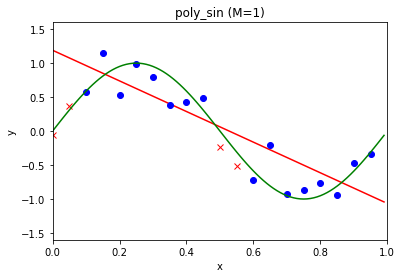

MSE= 0.5942067902301987
[ 0  1  2  5  6  7  9 10 11 12 13 14 15 16 18 19] [ 3  4  8 17]
[0.   0.05 0.1  0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[-0.06046692  0.36332735  0.568327    0.98644019  0.80149692  0.39062165
  0.48091338 -0.2288267  -0.52077513 -0.71893716 -0.1985039  -0.92562733
 -0.87382966 -0.76051615 -0.47012182 -0.34275333]
W
 [ 0.63413295 -1.47536188]


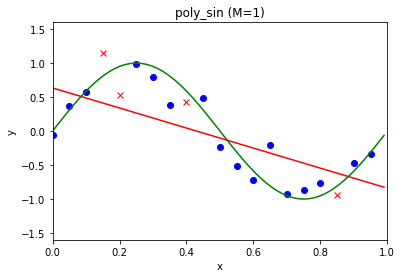

MSE= 0.2059813190162791
CV_MSE[1]=0.265174
[ 0  1  3  4  5  6  7  8  9 10 11 15 16 17 18 19] [ 2 12 13 14]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.75 0.8  0.85
 0.9  0.95]
[-0.06046692  0.36332735  1.14644548  0.53010236  0.98644019  0.80149692
  0.39062165  0.42242036  0.48091338 -0.2288267  -0.52077513 -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [ 0.58131329 -0.08275414 -1.58723637]


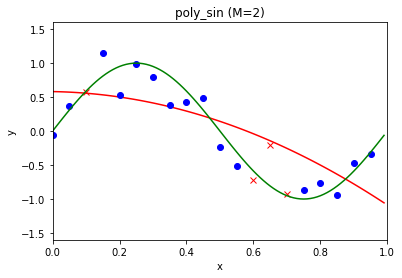

MSE= 0.2287745334521874
[ 1  2  3  5  6  7  8  9 10 12 13 14 15 17 18 19] [ 0  4 11 16]
[0.05 0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.85
 0.9  0.95]
[ 0.36332735  0.568327    1.14644548  0.98644019  0.80149692  0.39062165
  0.42242036  0.48091338 -0.2288267  -0.71893716 -0.1985039  -0.92562733
 -0.87382966 -0.9455376  -0.47012182 -0.34275333]
W
 [ 1.07560745 -2.28350005  0.26961211]


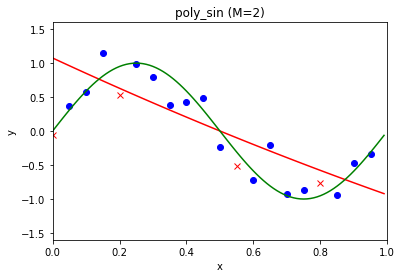

MSE= 0.37793963501389577
[ 0  1  2  4  5  6  9 10 11 12 13 14 16 17 18 19] [ 3  7  8 15]
[0.   0.05 0.1  0.2  0.25 0.3  0.45 0.5  0.55 0.6  0.65 0.7  0.8  0.85
 0.9  0.95]
[-0.06046692  0.36332735  0.568327    0.53010236  0.98644019  0.80149692
  0.48091338 -0.2288267  -0.52077513 -0.71893716 -0.1985039  -0.92562733
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [ 0.54257379 -0.77079214 -0.76720137]


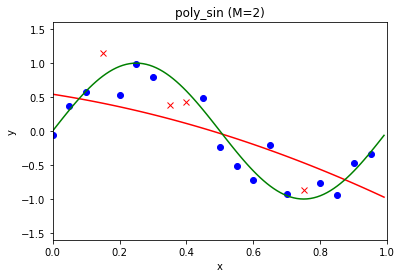

MSE= 0.21244692370821094
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16] [ 6 17 18 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8 ]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.98644019
  0.39062165  0.42242036  0.48091338 -0.2288267  -0.52077513 -0.71893716
 -0.1985039  -0.92562733 -0.87382966 -0.76051615]
W
 [ 0.40094374  1.71211494 -4.64184441]


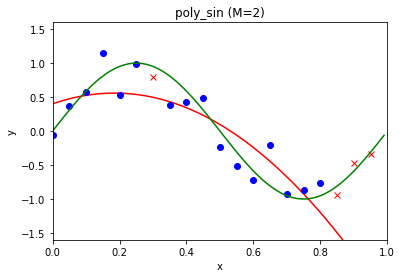

MSE= 1.3808400862173895
[ 0  2  3  4  6  7  8 11 12 13 14 15 16 17 18 19] [ 1  5  9 10]
[0.   0.1  0.15 0.2  0.3  0.35 0.4  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.06046692  0.568327    1.14644548  0.53010236  0.80149692  0.39062165
  0.42242036 -0.52077513 -0.71893716 -0.1985039  -0.92562733 -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [ 0.72942099 -1.47752657 -0.25431671]


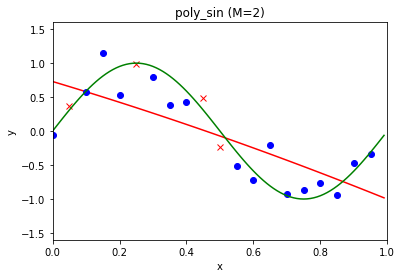

MSE= 0.18519504688515392
CV_MSE[2]=0.477039
[ 0  1  2  3  5  6  7  9 10 11 12 13 15 16 17 19] [ 4  8 14 18]
[0.   0.05 0.1  0.15 0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.75 0.8
 0.85 0.95]
[-0.06046692  0.36332735  0.568327    1.14644548  0.98644019  0.80149692
  0.39062165  0.48091338 -0.2288267  -0.52077513 -0.71893716 -0.1985039
 -0.87382966 -0.76051615 -0.9455376  -0.34275333]
W
 [-1.39172731e-02  9.70770409e+00 -2.93564282e+01  1.97966940e+01]


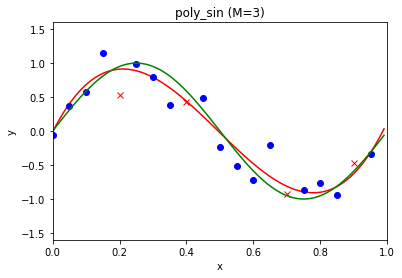

MSE= 0.04556994365985531
[ 0  2  3  4  5  6  8  9 12 13 14 15 16 17 18 19] [ 1  7 10 11]
[0.   0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.06046692  0.568327    1.14644548  0.53010236  0.98644019  0.80149692
  0.42242036  0.48091338 -0.71893716 -0.1985039  -0.92562733 -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [ -0.07141199   9.9434966  -29.12487473  19.35109526]


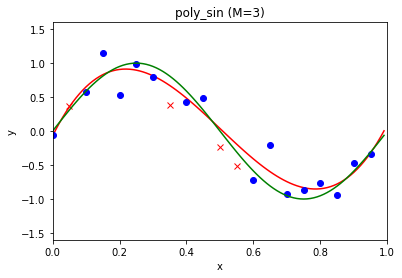

MSE= 0.06424780546401873
[ 0  1  2  3  4  5  6  7  8 10 11 12 14 15 18 19] [ 9 13 16 17]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.7  0.75
 0.9  0.95]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.98644019
  0.80149692  0.39062165  0.42242036 -0.2288267  -0.52077513 -0.71893716
 -0.92562733 -0.87382966 -0.47012182 -0.34275333]
W
 [ -0.03330947   9.76225006 -30.75671023  21.35297525]


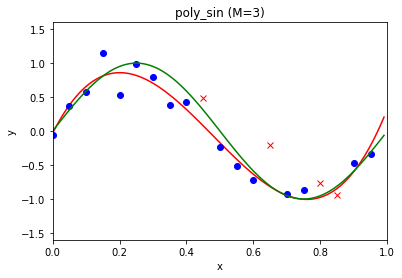

MSE= 0.1509327720796132
[ 0  1  3  4  7  8  9 10 11 13 14 15 16 17 18 19] [ 2  5  6 12]
[0.   0.05 0.15 0.2  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.06046692  0.36332735  1.14644548  0.53010236  0.39062165  0.42242036
  0.48091338 -0.2288267  -0.52077513 -0.1985039  -0.92562733 -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [ 5.29983156e-03  8.59556588e+00 -2.62813942e+01  1.77678011e+01]


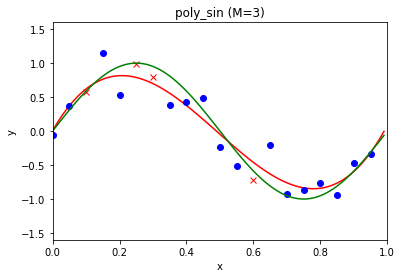

MSE= 0.02970096851722491
[ 1  2  4  5  6  7  8  9 10 11 12 13 14 16 17 18] [ 0  3 15 19]
[0.05 0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.8
 0.85 0.9 ]
[ 0.36332735  0.568327    0.53010236  0.98644019  0.80149692  0.39062165
  0.42242036  0.48091338 -0.2288267  -0.52077513 -0.71893716 -0.1985039
 -0.92562733 -0.76051615 -0.9455376  -0.47012182]
W
 [ -0.09166796   9.36608524 -28.21282404  19.1458033 ]


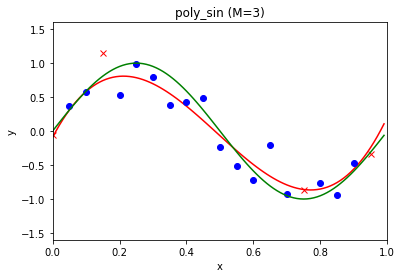

MSE= 0.04356789637953587
CV_MSE[3]=0.066804
[ 0  1  2  5  7  8  9 10 11 12 14 15 16 17 18 19] [ 3  4  6 13]
[0.   0.05 0.1  0.25 0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.06046692  0.36332735  0.568327    0.98644019  0.39062165  0.42242036
  0.48091338 -0.2288267  -0.52077513 -0.71893716 -0.92562733 -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [ -0.11546798  11.4847292  -37.69986152  32.1026633   -5.60661778]


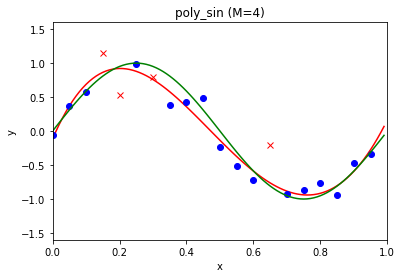

MSE= 0.13832719099471336
[ 0  1  3  4  5  6  7  8 10 11 12 13 14 15 17 18] [ 2  9 16 19]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.7  0.75
 0.85 0.9 ]
[-0.06046692  0.36332735  1.14644548  0.53010236  0.98644019  0.80149692
  0.39062165  0.42242036 -0.2288267  -0.52077513 -0.71893716 -0.1985039
 -0.92562733 -0.87382966 -0.9455376  -0.47012182]
W
 [ -0.06401283  11.54233836 -41.22555674  41.35079885 -11.69323295]


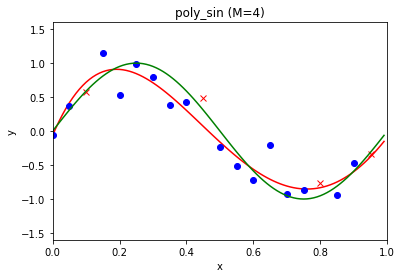

MSE= 0.04929776523509607
[ 0  1  2  3  4  5  6  8  9 10 12 13 14 16 17 19] [ 7 11 15 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.6  0.65 0.7  0.8
 0.85 0.95]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.98644019
  0.80149692  0.42242036  0.48091338 -0.2288267  -0.71893716 -0.1985039
 -0.92562733 -0.76051615 -0.9455376  -0.34275333]
W
 [ -0.06022039   9.95589985 -30.1329202   21.56825954  -1.31112585]


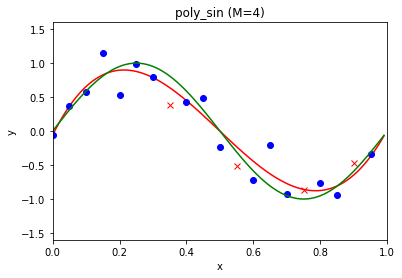

MSE= 0.04393437140069373
[ 2  3  4  5  6  7  9 10 11 12 13 15 16 17 18 19] [ 0  1  8 14]
[0.1  0.15 0.2  0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.75 0.8  0.85
 0.9  0.95]
[ 0.568327    1.14644548  0.53010236  0.98644019  0.80149692  0.39062165
  0.48091338 -0.2288267  -0.52077513 -0.71893716 -0.1985039  -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [ -0.090182    10.91475896 -36.62571741  33.48917168  -7.7118428 ]


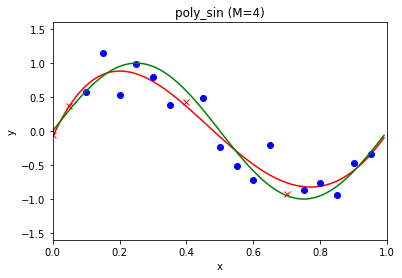

MSE= 0.007907145770224309
[ 0  1  2  3  4  6  7  8  9 11 13 14 15 16 18 19] [ 5 10 12 17]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.55 0.65 0.7  0.75 0.8
 0.9  0.95]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.80149692
  0.39062165  0.42242036  0.48091338 -0.52077513 -0.1985039  -0.92562733
 -0.87382966 -0.76051615 -0.47012182 -0.34275333]
W
 [ -0.03949835   9.47146271 -29.77595813  23.24693643  -2.8458011 ]


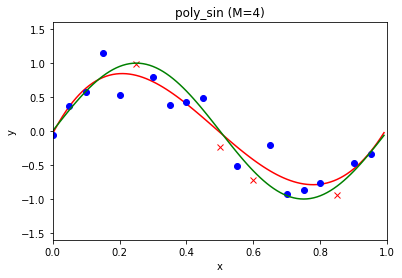

MSE= 0.05349092678974504
CV_MSE[4]=0.058591
[ 0  1  2  3  5  8  9 11 12 13 14 15 16 17 18 19] [ 4  6  7 10]
[0.   0.05 0.1  0.15 0.25 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.06046692  0.36332735  0.568327    1.14644548  0.98644019  0.42242036
  0.48091338 -0.52077513 -0.71893716 -0.1985039  -0.92562733 -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [ -0.09970891  11.17858026 -28.68921347   0.24501099  35.15430011
 -17.84634821]


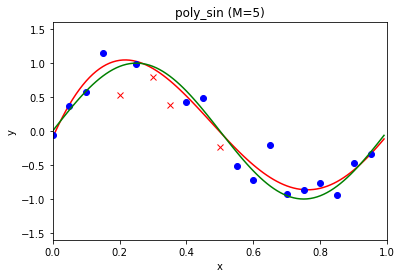

MSE= 0.11140632194731608
[ 0  1  3  4  5  6  7  9 10 12 13 15 16 17 18 19] [ 2  8 11 14]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.45 0.5  0.6  0.65 0.75 0.8  0.85
 0.9  0.95]
[-0.06046692  0.36332735  1.14644548  0.53010236  0.98644019  0.80149692
  0.39062165  0.48091338 -0.2288267  -0.71893716 -0.1985039  -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [-8.31148004e-02  1.29227067e+01 -5.52433109e+01  9.10929853e+01
 -7.89848265e+01  3.04855747e+01]


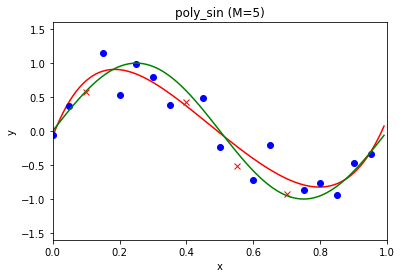

MSE= 0.042595099272927345
[ 0  1  2  3  4  5  6  7  8 10 11 13 14 15 16 18] [ 9 12 17 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.65 0.7  0.75
 0.8  0.9 ]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.98644019
  0.80149692  0.39062165  0.42242036 -0.2288267  -0.52077513 -0.1985039
 -0.92562733 -0.87382966 -0.76051615 -0.47012182]
W
 [ -0.09064429  11.69536082 -43.44438383  51.03748316 -25.83907866
   6.8004572 ]


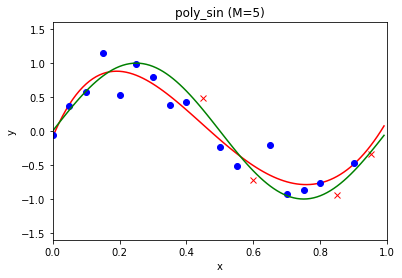

MSE= 0.07262636770871858
[ 1  2  3  4  5  6  7  8  9 10 11 12 14 17 18 19] [ 0 13 15 16]
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.85
 0.9  0.95]
[ 0.36332735  0.568327    1.14644548  0.53010236  0.98644019  0.80149692
  0.39062165  0.42242036  0.48091338 -0.2288267  -0.52077513 -0.71893716
 -0.92562733 -0.9455376  -0.47012182 -0.34275333]
W
 [  0.08256804   6.51040249  -6.07797599 -46.71705399  77.69425009
 -31.40641234]


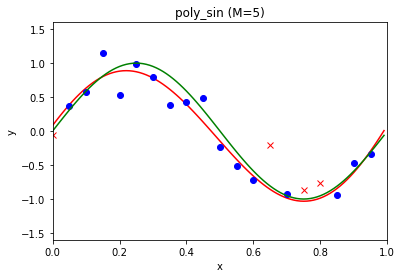

MSE= 0.13295322405339594
[ 0  2  4  6  7  8  9 10 11 12 13 14 15 16 17 19] [ 1  3  5 18]
[0.   0.1  0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.95]
[-0.06046692  0.568327    0.53010236  0.80149692  0.39062165  0.42242036
  0.48091338 -0.2288267  -0.52077513 -0.71893716 -0.1985039  -0.92562733
 -0.87382966 -0.76051615 -0.9455376  -0.34275333]
W
 [ -0.04500179   6.57265022 -11.94099427 -17.10588793  35.8234029
 -13.31830555]


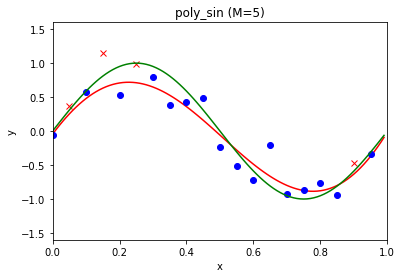

MSE= 0.09486734792075827
CV_MSE[5]=0.090890
[ 2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 19] [ 0  1  5 18]
[0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.95]
[ 0.568327    1.14644548  0.53010236  0.80149692  0.39062165  0.42242036
  0.48091338 -0.2288267  -0.52077513 -0.71893716 -0.1985039  -0.92562733
 -0.87382966 -0.76051615 -0.9455376  -0.34275333]
W
 [   0.42263141    0.90948207   32.03043491 -194.33601877  385.61248566
 -338.17719497  113.80690021]


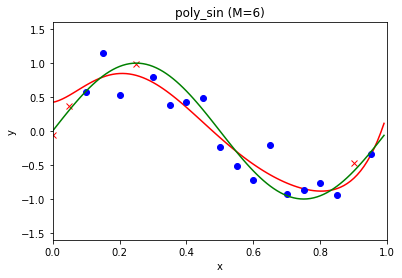

MSE= 0.0844286817149587
[ 0  1  2  3  4  5  6  7  8  9 11 12 14 16 17 18] [10 13 15 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.55 0.6  0.7  0.8
 0.85 0.9 ]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.98644019
  0.80149692  0.39062165  0.42242036  0.48091338 -0.52077513 -0.71893716
 -0.92562733 -0.76051615 -0.9455376  -0.47012182]
W
 [-7.59224770e-02  1.20002039e+01 -5.99098843e+01  1.73849296e+02
 -3.51924551e+02  3.64505903e+02 -1.38877371e+02]


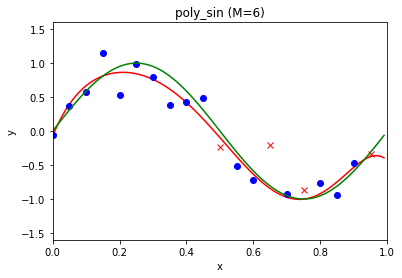

MSE= 0.1134682950357467
[ 0  1  2  3  4  5  7  8 10 11 13 14 15 17 18 19] [ 6  9 12 16]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.5  0.55 0.65 0.7  0.75 0.85
 0.9  0.95]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.98644019
  0.39062165  0.42242036 -0.2288267  -0.52077513 -0.1985039  -0.92562733
 -0.87382966 -0.9455376  -0.47012182 -0.34275333]
W
 [-7.17580330e-02  1.00992222e+01 -2.25294794e+01 -5.52367828e+01
  2.16648944e+02 -2.43916557e+02  9.54529573e+01]


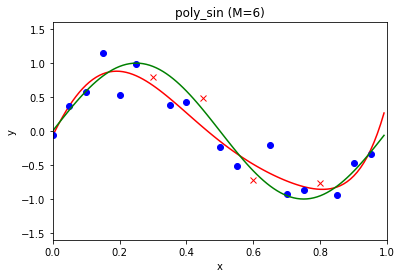

MSE= 0.06555349457935691
[ 0  1  2  4  5  6  9 10 11 12 13 14 15 16 18 19] [ 3  7  8 17]
[0.   0.05 0.1  0.2  0.25 0.3  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[-0.06046692  0.36332735  0.568327    0.53010236  0.98644019  0.80149692
  0.48091338 -0.2288267  -0.52077513 -0.71893716 -0.1985039  -0.92562733
 -0.87382966 -0.76051615 -0.47012182 -0.34275333]
W
 [-1.36957108e-02  6.32250938e+00 -7.75174009e+00 -1.70024850e+01
 -1.36872103e+01  7.86265155e+01 -4.68807921e+01]


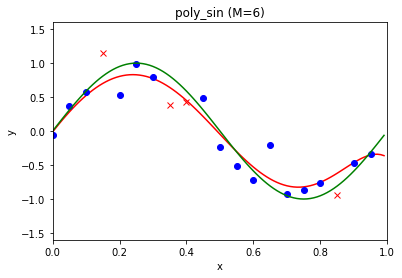

MSE= 0.09187736657686796
[ 0  1  3  5  6  7  8  9 10 12 13 15 16 17 18 19] [ 2  4 11 14]
[0.   0.05 0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.75 0.8  0.85
 0.9  0.95]
[-0.06046692  0.36332735  1.14644548  0.98644019  0.80149692  0.39062165
  0.42242036  0.48091338 -0.2288267  -0.71893716 -0.1985039  -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [-1.05695541e-01  1.37036519e+01 -4.29793226e+01 -4.37624241e+00
  1.51286139e+02 -2.01164965e+02  8.40352002e+01]


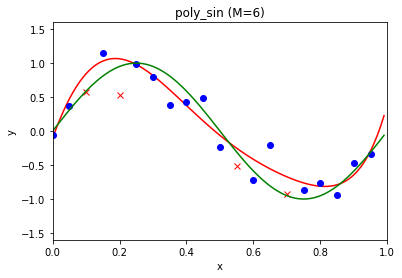

MSE= 0.1240852666329206
CV_MSE[6]=0.095883
[ 0  1  2  4  5  6  7  8 10 11 12 13 14 15 17 19] [ 3  9 16 18]
[0.   0.05 0.1  0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.7  0.75
 0.85 0.95]
[-0.06046692  0.36332735  0.568327    0.53010236  0.98644019  0.80149692
  0.39062165  0.42242036 -0.2288267  -0.52077513 -0.71893716 -0.1985039
 -0.92562733 -0.87382966 -0.9455376  -0.34275333]
W
 [-4.55550338e-02  1.11629914e+01 -9.34422886e+01  5.62413823e+02
 -1.94633573e+03  3.41733607e+03 -2.89271504e+03  9.43215980e+02]


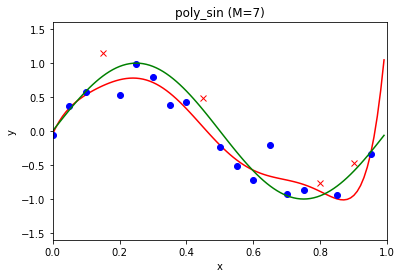

MSE= 0.16294242193857175
[ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19] [12 13 14 15]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.8  0.85
 0.9  0.95]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.98644019
  0.80149692  0.39062165  0.42242036  0.48091338 -0.2288267  -0.52077513
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [-8.33051164e-02  1.31979870e+01 -8.13883294e+01  3.18183842e+02
 -8.15374630e+02  1.12392796e+03 -7.50957881e+02  1.92371356e+02]


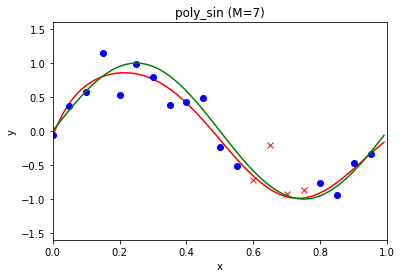

MSE= 0.11264926149921947
[ 1  2  3  4  5  6  7  9 11 12 13 14 15 16 18 19] [ 0  8 10 17]
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.45 0.55 0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[ 0.36332735  0.568327    1.14644548  0.53010236  0.98644019  0.80149692
  0.39062165  0.48091338 -0.52077513 -0.71893716 -0.1985039  -0.92562733
 -0.87382966 -0.76051615 -0.47012182 -0.34275333]
W
 [-4.56485525e-01  2.22690751e+01 -1.52267283e+02  5.68828332e+02
 -1.27604856e+03  1.59116497e+03 -1.00280987e+03  2.49139971e+02]


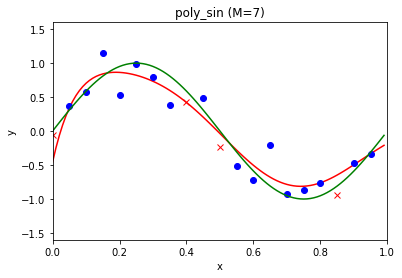

MSE= 0.07072597739713438
[ 0  1  2  3  5  7  8  9 10 12 13 14 15 16 17 18] [ 4  6 11 19]
[0.   0.05 0.1  0.15 0.25 0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[-0.06046692  0.36332735  0.568327    1.14644548  0.98644019  0.39062165
  0.42242036  0.48091338 -0.2288267  -0.71893716 -0.1985039  -0.92562733
 -0.87382966 -0.76051615 -0.9455376  -0.47012182]
W
 [-6.51002793e-02  6.86493541e+00  4.10864815e+01 -4.14147081e+02
  1.15198201e+03 -1.49255029e+03  9.17268279e+02 -2.08937311e+02]


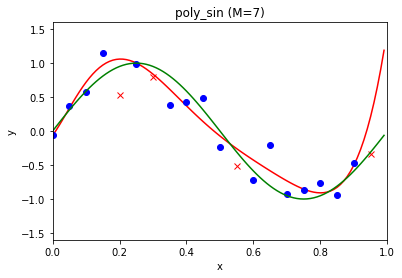

MSE= 0.1653975060133399
[ 0  3  4  6  8  9 10 11 12 13 14 15 16 17 18 19] [1 2 5 7]
[0.   0.15 0.2  0.3  0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.06046692  1.14644548  0.53010236  0.80149692  0.42242036  0.48091338
 -0.2288267  -0.52077513 -0.71893716 -0.1985039  -0.92562733 -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [-5.38157076e-02  4.14882638e+01 -4.73191831e+02  2.37395459e+03
 -6.18800622e+03  8.61446506e+03 -6.08012187e+03  1.71257853e+03]


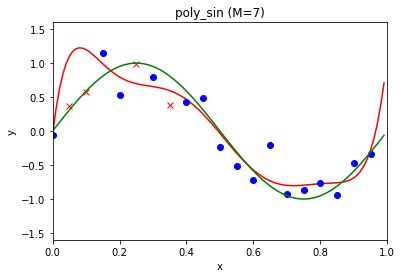

MSE= 0.26565508147025246
CV_MSE[7]=0.155474
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 16 19] [ 8 15 17 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.7
 0.8  0.95]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.98644019
  0.80149692  0.39062165  0.48091338 -0.2288267  -0.52077513 -0.71893716
 -0.1985039  -0.92562733 -0.76051615 -0.34275333]
W
 [-6.18457680e-02  6.07321153e+00  8.83776086e+01 -1.18985479e+03
  5.82564291e+03 -1.49345848e+04  2.09256061e+04 -1.50880346e+04
  4.37084816e+03]


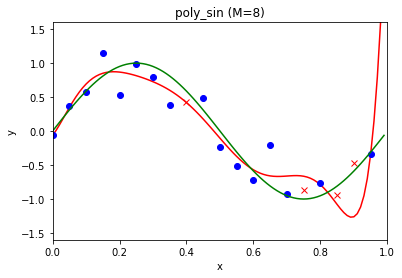

MSE= 0.17195328823734302
[ 0  2  4  5  6  7  8  9 11 13 14 15 16 17 18 19] [ 1  3 10 12]
[0.   0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.55 0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.06046692  0.568327    0.53010236  0.98644019  0.80149692  0.39062165
  0.42242036  0.48091338 -0.52077513 -0.1985039  -0.92562733 -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [-5.92658730e-02  2.64954985e+01 -4.16661544e+02  3.10046800e+03
 -1.19839927e+04  2.55731630e+04 -3.05432872e+04  1.91505796e+04
 -4.90805492e+03]


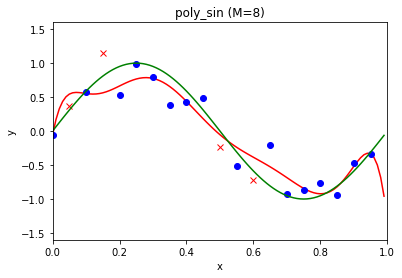

MSE= 0.12872894654886036
[ 0  1  2  3  4  6  8  9 10 11 12 14 15 17 18 19] [ 5  7 13 16]
[0.   0.05 0.1  0.15 0.2  0.3  0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.85
 0.9  0.95]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.80149692
  0.42242036  0.48091338 -0.2288267  -0.52077513 -0.71893716 -0.92562733
 -0.87382966 -0.9455376  -0.47012182 -0.34275333]
W
 [-7.88310051e-02  1.18651671e+01 -4.21520443e+01 -1.16523892e+02
  1.40477248e+03 -4.71030011e+03  7.42421637e+03 -5.61595290e+03
  1.64502424e+03]


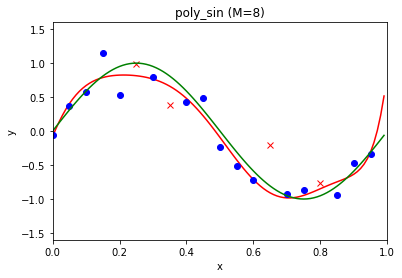

MSE= 0.15400361436236287
[ 1  3  5  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 2 4 6]
[0.05 0.15 0.25 0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.36332735  1.14644548  0.98644019  0.39062165  0.42242036  0.48091338
 -0.2288267  -0.52077513 -0.71893716 -0.1985039  -0.92562733 -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [-3.45362739e+00  1.29034297e+02 -1.37540474e+03  7.46201684e+03
 -2.31232005e+04  4.22794619e+04 -4.50694243e+04  2.58862695e+04
 -6.18631700e+03]


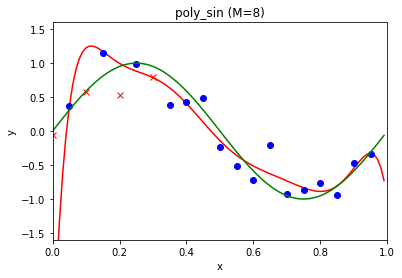

MSE= 3.0408759871619786
[ 0  1  2  3  4  5  6  7  8 10 12 13 15 16 17 18] [ 9 11 14 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.6  0.65 0.75 0.8
 0.85 0.9 ]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.98644019
  0.80149692  0.39062165  0.42242036 -0.2288267  -0.71893716 -0.1985039
 -0.87382966 -0.76051615 -0.9455376  -0.47012182]
W
 [-6.88095648e-02  1.06836465e+01 -3.82397099e+01  3.45082267e+01
  2.34317773e+02 -1.50039185e+03  3.49360013e+03 -3.55403738e+03
  1.32711727e+03]


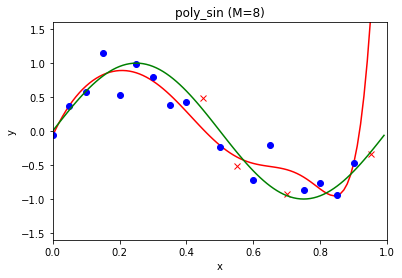

MSE= 1.1034676527261098
CV_MSE[8]=0.919806
[ 2  3  4  5  6  7  8  9 10 11 12 14 15 16 18 19] [ 0  1 13 17]
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.8
 0.9  0.95]
[ 0.568327    1.14644548  0.53010236  0.98644019  0.80149692  0.39062165
  0.42242036  0.48091338 -0.2288267  -0.52077513 -0.71893716 -0.92562733
 -0.87382966 -0.76051615 -0.47012182 -0.34275333]
W
 [-1.61464182e+01  4.32776164e+02 -4.43494312e+03  2.43689691e+04
 -8.02095827e+04  1.65957746e+05 -2.18473172e+05  1.78141199e+05
 -8.21662505e+04  1.64000307e+04]


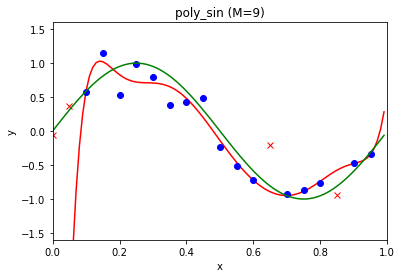

MSE= 67.67522979428331
[ 0  1  2  3  5  6  7  8  9 10 12 13 14 15 16 17] [ 4 11 18 19]
[0.   0.05 0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75
 0.8  0.85]
[-0.06046692  0.36332735  0.568327    1.14644548  0.98644019  0.80149692
  0.39062165  0.42242036  0.48091338 -0.2288267  -0.71893716 -0.1985039
 -0.92562733 -0.87382966 -0.76051615 -0.9455376 ]
W
 [-4.46245032e-02 -3.21146488e-01  2.14466820e+02 -1.97128762e+03
  8.16578654e+03 -1.94021155e+04  2.81896524e+04 -2.49813599e+04
  1.25550317e+04 -2.77660241e+03]


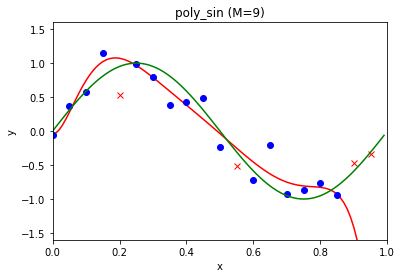

MSE= 2.0122399636757313
[ 0  1  2  3  4  6  8  9 11 12 13 15 16 17 18 19] [ 5  7 10 14]
[0.   0.05 0.1  0.15 0.2  0.3  0.4  0.45 0.55 0.6  0.65 0.75 0.8  0.85
 0.9  0.95]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.80149692
  0.42242036  0.48091338 -0.52077513 -0.71893716 -0.1985039  -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [-4.86208942e-02 -1.17739444e+01  6.76554670e+02 -8.15285114e+03
  4.61157589e+04 -1.44287405e+05  2.63210083e+05 -2.78457801e+05
  1.58297043e+05 -3.73947271e+04]


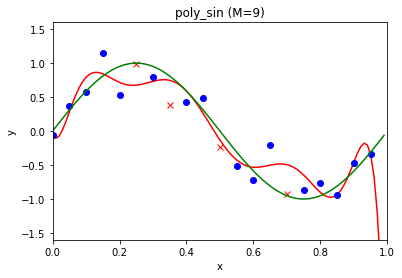

MSE= 0.10474257593029318
[ 0  1  2  3  4  5  7  8 10 11 12 13 14 17 18 19] [ 6  9 15 16]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.5  0.55 0.6  0.65 0.7  0.85
 0.9  0.95]
[-0.06046692  0.36332735  0.568327    1.14644548  0.53010236  0.98644019
  0.39062165  0.42242036 -0.2288267  -0.52077513 -0.71893716 -0.1985039
 -0.92562733 -0.9455376  -0.47012182 -0.34275333]
W
 [-5.48949241e-02 -5.69874407e-01  3.04473580e+02 -3.81148968e+03
  2.18425185e+04 -7.01202912e+04  1.32315867e+05 -1.45227182e+05
  8.56524520e+04 -2.09601748e+04]


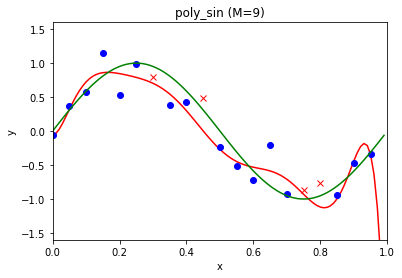

MSE= 0.09276978914614409
[ 0  1  4  5  6  7  9 10 11 13 14 15 16 17 18 19] [ 2  3  8 12]
[0.   0.05 0.2  0.25 0.3  0.35 0.45 0.5  0.55 0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.06046692  0.36332735  0.53010236  0.98644019  0.80149692  0.39062165
  0.48091338 -0.2288267  -0.52077513 -0.1985039  -0.92562733 -0.87382966
 -0.76051615 -0.9455376  -0.47012182 -0.34275333]
W
 [-5.76510316e-02  1.90823947e+01 -3.24202648e+02  2.62040425e+03
 -1.05139805e+04  2.23956567e+04 -2.55192233e+04  1.38452617e+04
 -1.71041561e+03 -8.14085458e+02]


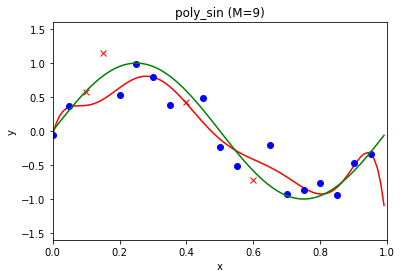

MSE= 0.14807544646929238
CV_MSE[9]=14.006612


In [4]:
from sklearn.model_selection import KFold

search_range = [0,1,2,3,4,5,6,7,8,9]
n_fold = 5

CV_MSE = np.zeros(len(search_range))

for M in search_range:

  kf = KFold(n_splits=n_fold, shuffle=True)
  for train_indx, test_indx in kf.split(x_train):
    print("%s %s" % (train_indx, test_indx))
    x_train_cv = x_train[train_indx]
    y_train_cv = y_train[train_indx]
    x_test_cv = x_train[test_indx]
    y_test_cv = y_train[test_indx]

    print(x_train_cv)
    print(y_train_cv)

    W = E(x_train_cv, y_train_cv, M)
    print('W\n', W)

    y_estimate_cv = [y(x, W, M) for x in x_test_cv]

    y_estimate = [y(x, W, M) for x in x_real]

    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train_cv, y_train_cv, 'bo')
    plt.plot(x_test_cv, y_test_cv, 'rx') 
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%s)" % M)
    plt.xlabel('x')
    plt.ylabel('y')
#    plt.savefig('poly_sin_%d.eps' % M)
    plt.show()
    plt.close()


    mse = (np.square(y_test_cv - y_estimate_cv)).mean()
    print('MSE=', mse)

    CV_MSE[M] += mse

  CV_MSE[M]=CV_MSE[M]/n_fold

  print('CV_MSE[%d]=%f'% (M, CV_MSE[M]))



CV_MSE
 [ 0.51608408  0.26517351  0.47703925  0.06680388  0.05859148  0.09088967
  0.09588262  0.15547405  0.9198059  14.00661151]
The best order of the model is 5


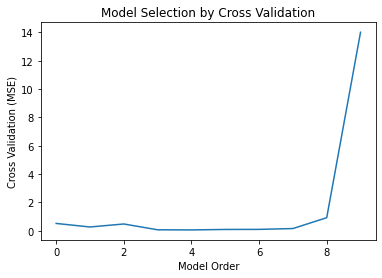

In [5]:
print('CV_MSE\n', CV_MSE)
print('The best order of the model is %d' % (np.argmin(CV_MSE)+1))

plt.plot(CV_MSE)
plt.title("Model Selection by Cross Validation")
plt.xlabel('Model Order')
plt.ylabel('Cross Validation (MSE)')
plt.savefig('poly_sin_cvMSE.eps')
plt.show()
plt.close()
